# Proportional-only Control

A variation of Proportional Integral Derivative (PID) control is to use only the proportional term as a P-only control. The value of the controller output $u(t)$ is fed into the system as the manipulated variable input.

$$u(t) = u_{bias} + K_c \, \left( SP-PV \right) = u_{bias} + K_c \, e(t)$$

The $u_{bias}$ term is a constant that is typically set to the value of $u(t)$ when the controller is first switched from manual to automatic mode. This gives "bumpless" transfer if the error is zero when the controller is turned on. The one tuning value for a P-only controller is the controller gain, $K_{c}$. The value of $K_{c}$ is a multiplier on the error and a higher value makes the controller more aggressive at responding to any error away from the set point. The set point (SP) is the target value and process variable (PV) is the measured value that may deviate from the desired value. The error from the set point is the difference between the SP and PV and is defined as $e(t) = SP - PV$.

### Integrating versus Non-Integrating Processes

The output of a non-integrating process returns to the same steady-state value after an input impulse response. An integrating process does not return to the same steady-state value after the impulse response.

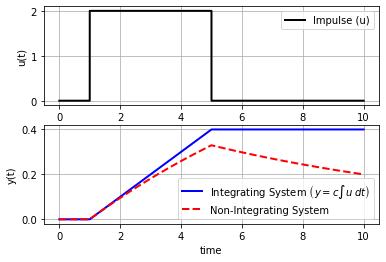

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# time
t = np.linspace(0,10,101)

# step functions
s1 = np.zeros(101); s1[11:] = 1.0
s2 = np.zeros(101); s2[51:] = 1.0

# solution to non-integrating system
# taup * dy/dt = -y + Kp * u
du=2; Kp=1; taup=10
y1 = Kp*(1-np.exp(-(t-1)/taup))*s1 \
    -Kp*(1-np.exp(-(t-5)/taup))*s2

# solution to integrating system
# dy/dt = Kp/taup * u
y2 = (Kp/taup)*(t-1)*s1 \
    -(Kp/taup)*(t-5)*s2

plt.figure(1)
plt.subplot(2,1,1)
plt.plot([0,1,1.001,5,5.001,10],\
         [0,0,du,du,0,0],'k-',lw=2,label='Impulse (u)')
plt.grid(); plt.legend(); plt.ylabel('u(t)')
plt.subplot(2,1,2)
plt.plot(t,y2,'b-', lw=2,\
  label=r'Integrating System $\left(y=c\int u \; dt\right)$')
plt.plot(t,y1,'r--',lw=2,\
  label=r'Non-Integrating System')
plt.legend(); plt.grid(); plt.xlabel('time'); plt.ylabel('y(t)')
plt.savefig('pictures/figure.png',dpi=300,bbox_inches='tight')

plt.show()

Consider the example of a water bottle with a leak (non-integrating system) and without a leak (integrating system). When the water bottle is filled, the level returns to zero for the non-integrating system. For the bottle without a leak, the volume of liquid in the container is the integral of the inlet flow and doesn't return to zero.

### Controller Offset

P-only control is needed for integrating processes (e.g. tank level control with no outlet flow). If used on non-integrating processes there may be persistent offset between the desired set point and process variable with a P-only controller. Integral action is typically used to remove offset (see PI Control).

### Tuning Correlations
A common tuning correlation for P-only control is the ITAE (Integral of Time-weighted Absolute Error) method. Different tuning correlations are provided for disturbance rejection (also referred to as regulatory control) and set point tracking (also referred to as servo control).

$$K_c = \frac{0.20}{K_p}\left(\frac{\tau_p}{\theta_p}\right)^{1.22} \quad \mathrm{Set\;point\;tracking}$$

$$K_c = \frac{0.50}{K_p}\left(\frac{\tau_p}{\theta_p}\right)^{1.08}\quad \mathrm{Disturbance\;rejection}$$

The parameters $K_{p}, \tau_{p}$, and $\theta_{p}$ are obtained by fitting dynamic input and output data to a first-order plus dead-time (FOPDT) model.